# **Exploración y Visualización de Datos (EDA)**

**Carga y Exploración Inicial de Datos**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('retail_sales_dataset.csv')
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [29]:
#Convertir tipos de datos
dtype = {
    'Transaction ID': 'int',
    'Date': 'datetime64[ns]',
    'Customer ID': 'str',
    'Gender': 'category',
    'Age': 'int',
    'Product Category': 'category',
    'Quantity': 'int',
    'Price per Unit': 'float',
    'Total Amount': 'float'
}

df = df.astype(dtype)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   category      
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   category      
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   float64       
 8   Total Amount      1000 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 57.0+ KB


In [30]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [31]:
#Identificar y tratar valores nulos
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


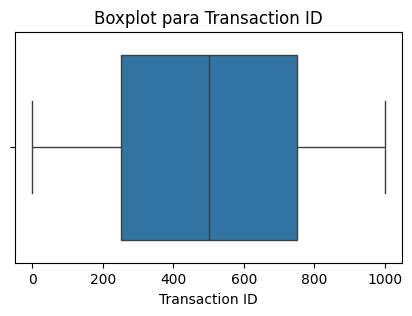

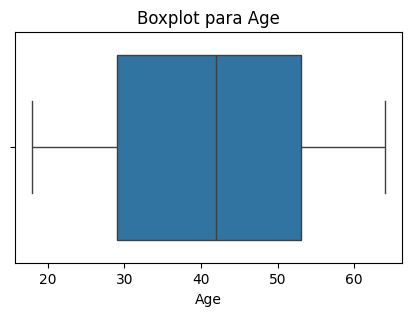

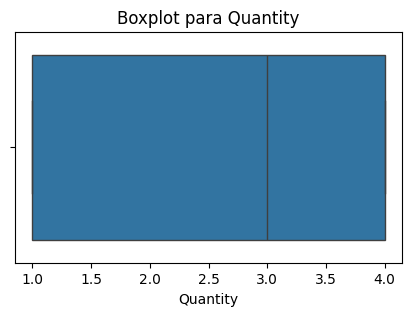

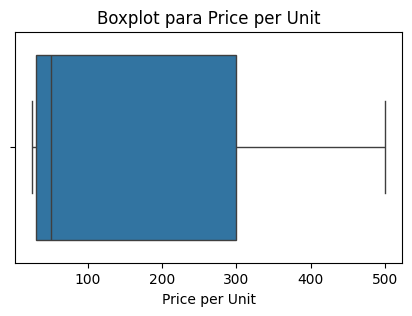

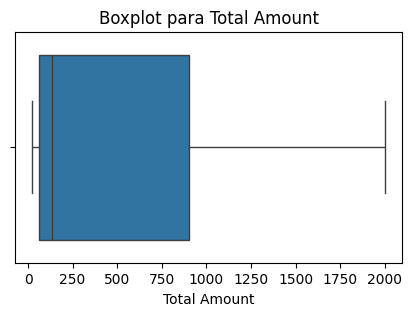

In [38]:
#Detectar outliers con boxplots
num_col = df.select_dtypes(include=['int64', 'float64']).columns

for i in num_col:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot para {i}')
    plt.show()

#no se detectaron outliers

In [45]:
#Crear nuevas columnas
#Calcular el ingreso total por venta
df['Total ventas'] = df['Price per Unit'] * df['Quantity']

#clasificar la edad en rangos

def edad(i):
  if i >= 60:
    return 'Adulto Mayor'
  elif i <= 24:
    return 'Joven'
  else:
    return 'Adulto'

df['Categoria Edad'] = df['Age'].apply(edad)

#Crear una columna que clasifique las ventas en categorías significativas
bajo = df['Total Amount'].quantile(0.33)
alto =  df['Total Amount'].quantile(0.66)

def ventas(i):
  if i >= alto:
    return 'Alto'
  elif i <= bajo:
    return 'Bajo'
  else:
    return 'Medio'

df['Categoria Ventas'] = df['Total Amount'].apply(ventas)

df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Total ventas,Categoria Edad,Categoria Ventas
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50.0,150.0,150.0,Adulto,Medio
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500.0,1000.0,1000.0,Adulto,Alto
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30.0,30.0,30.0,Adulto,Bajo
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500.0,500.0,500.0,Adulto,Alto
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50.0,100.0,100.0,Adulto,Medio


**Análisis de Correlación**

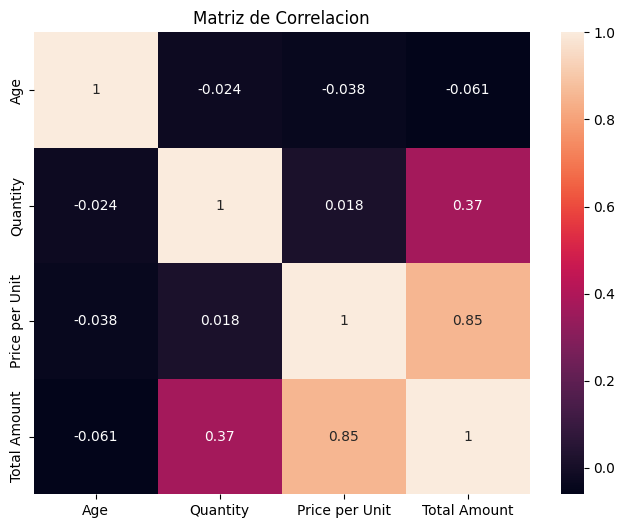

In [41]:
numerico = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']]

matriz = numerico.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True)
plt.title('Matriz de Correlacion')
plt.show()

**Visualización de Datos**

<ipython-input-46-36ba51be1788>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos = df.groupby('Product Category')['Quantity'].sum().reset_index()


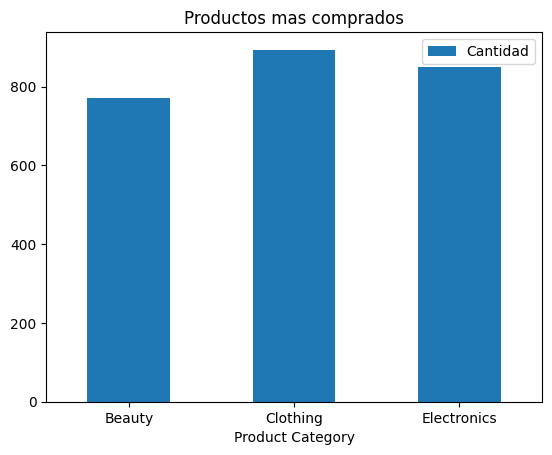

In [46]:
#Crear subplots para comparar diferentes variables clave
productos = df.groupby('Product Category')['Quantity'].sum().reset_index()

productos.plot(kind='bar', x='Product Category', y='Quantity')
plt.title('Productos mas comprados')
plt.xticks(rotation=0)
plt.legend(['Cantidad'])

plt.show()

Text(0, 0.5, 'Total ventas')

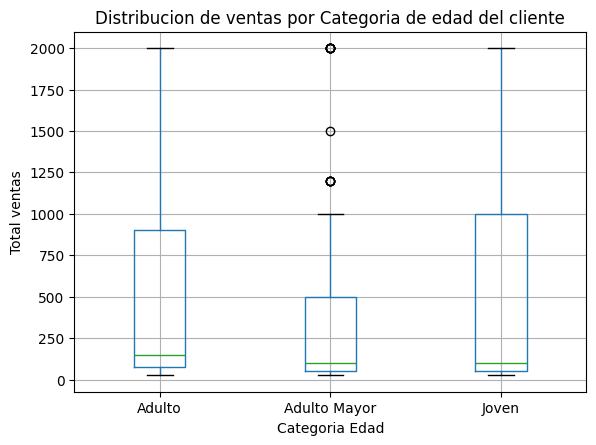

In [47]:
edad = df[['Categoria Edad', 'Total ventas']]

edad.boxplot(column='Total ventas', by='Categoria Edad')
plt.title('Distribucion de ventas por Categoria de edad del cliente')
plt.suptitle('')
plt.xlabel('Categoria Edad')
plt.ylabel('Total ventas')

Text(0.5, 0, 'Fechas')

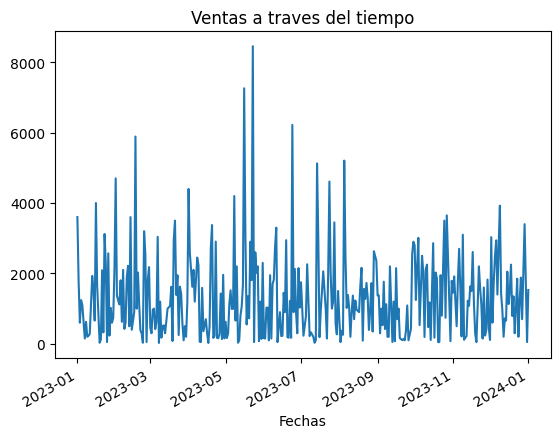

In [48]:
df['Date'] = pd.to_datetime(df['Date'])
fechas = df.groupby('Date')['Total Amount'].sum()

fechas.plot(x='Date', y='Total Amount')
plt.title('Ventas a traves del tiempo')
plt.xlabel('Fechas')

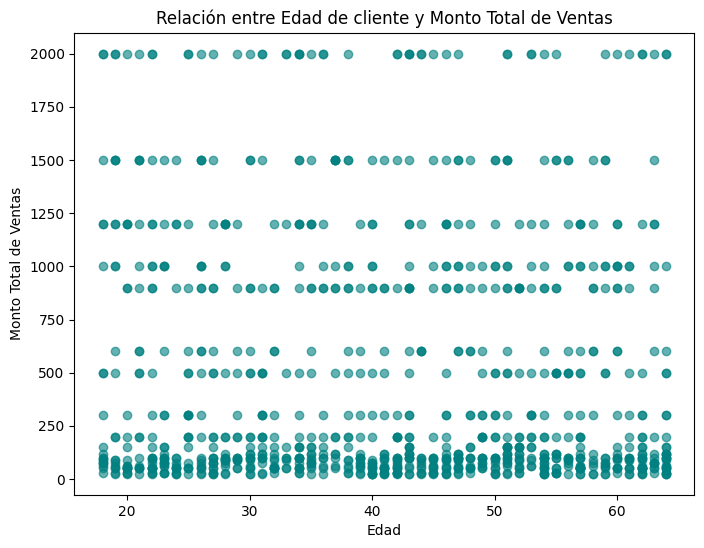

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Total Amount'], color='teal', alpha=0.6)
plt.title('Relación entre Edad de cliente y Monto Total de Ventas')
plt.xlabel('Edad')
plt.ylabel('Monto Total de Ventas')

plt.show()

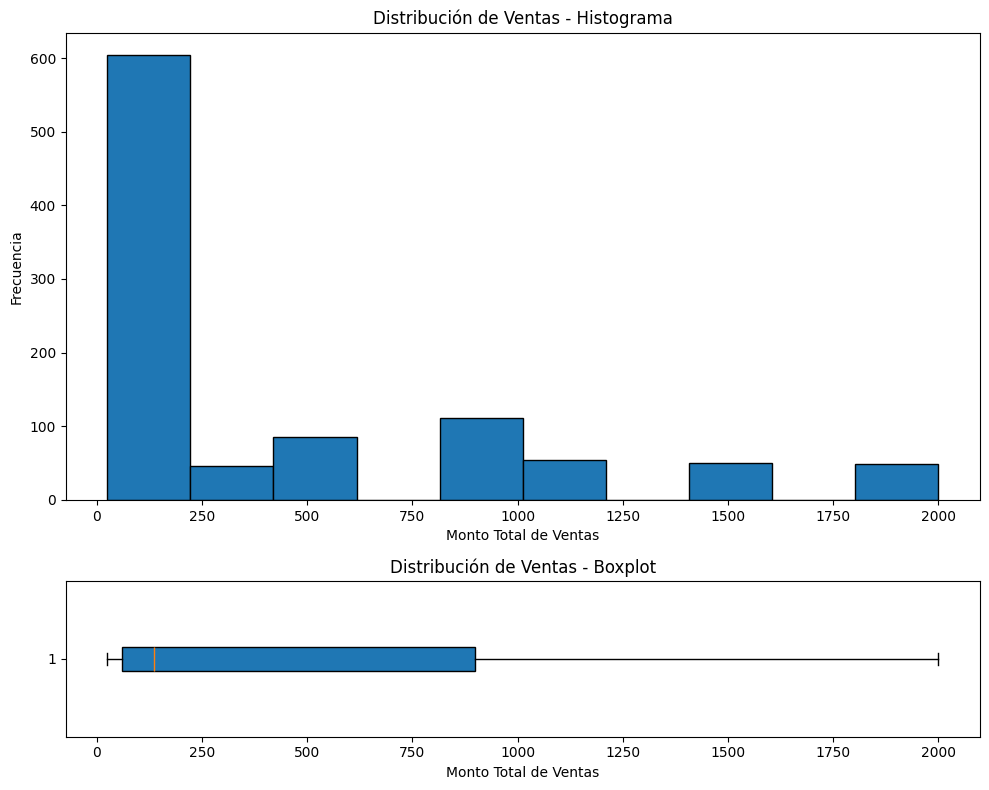

In [50]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

ax1.hist(df['Total Amount'], edgecolor='black')
ax1.set_title('Distribución de Ventas - Histograma')
ax1.set_xlabel('Monto Total de Ventas')
ax1.set_ylabel('Frecuencia')

ax2.boxplot(df['Total Amount'], vert=False, patch_artist=True, boxprops=dict(color='black'))
ax2.set_title('Distribución de Ventas - Boxplot')
ax2.set_xlabel('Monto Total de Ventas')

plt.tight_layout()
plt.show()

In [51]:
df.to_csv('data_modificada')